In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Expenses - Sheet1.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867
5,31,female,26,0,no,southeast,3757
6,46,female,33,1,no,southeast,8241
7,37,female,28,3,no,northwest,7282
8,37,male,30,2,no,northeast,6406
9,60,female,26,0,no,northwest,28923


# Exploratory Data Analysis ↓

In [4]:
df.info()  # Summary of columns count and its dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   int64 
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   int64 
 3   children  1338 non-null   int64 
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()   # Null check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## There are no nulls present in dataset

In [6]:
# creating a column whether having children or not (Yes or No)
df1 = pd.DataFrame()
df1['children_status'] = df['children'].replace({0 :'No' , 1: "Yes" , 2: "Yes" ,3: "Yes" ,4: "Yes" ,5: "Yes" })
df = pd.concat([df,df1], axis=1)

In [7]:
def uniquevals(col):
    print(f'Unique data in Column → {col} is → {df[col].unique()}')
      
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Unique data in Column → age is → [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
---------------------------------------------------------------------------
Unique data in Column → sex is → ['female' 'male']
---------------------------------------------------------------------------
Unique data in Column → bmi is → [28 34 33 23 29 26 30 40 42 25 31 24 35 36 32 17 20 21 37 27 22 39 38 41
 19 49 18 16 48 46 44 43 47 45 50 53]
---------------------------------------------------------------------------
Unique data in Column → children is → [0 1 3 2 5 4]
---------------------------------------------------------------------------
Unique data in Column → smoker is → ['yes' 'no']
---------------------------------------------------------------------------
Unique data in Column → region is → ['southwest' 'southeast' 'northwest' 'northeast']
-------------------------------------------------------------

## From above data we can see that there following types of features →
### ● Continuous : age, bmi , charges
### ● Ordinal : children (0,1,2,3,4,5)
### ● Binary-Categorical : sex, smoker 
### ● Categorical/Nominal : region

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.673393,6.095002,16.0,26.0,30.0,35.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13270.417788,12110.013559,1122.0,4740.0,9382.0,16640.25,63770.0


### ● Range of min to max age is from 18 to 64 years
### ● Looking at the age column, data looks representative of the true age distribution of the adult population
### ● Very few people have more than 2 children. 75% of the people have 2 or less children¶



### ● Range of BMI is from 16 to 53
### ● Range of children count is from 0 to 5

In [9]:
print('● Sex Value Counts')
print(df.sex.value_counts())
print('**********')
print('**********')
print('● Smokers Value Counts')
print(df.smoker.value_counts())

● Sex Value Counts
male      676
female    662
Name: sex, dtype: int64
**********
**********
● Smokers Value Counts
no     1064
yes     274
Name: smoker, dtype: int64


## Box plot for charges 18 years old smokers

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

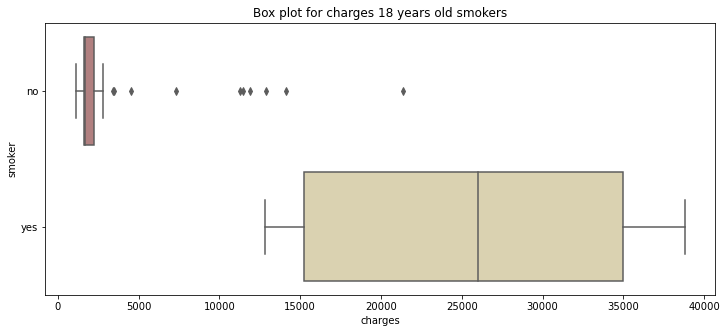

In [10]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

## From above as we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails."

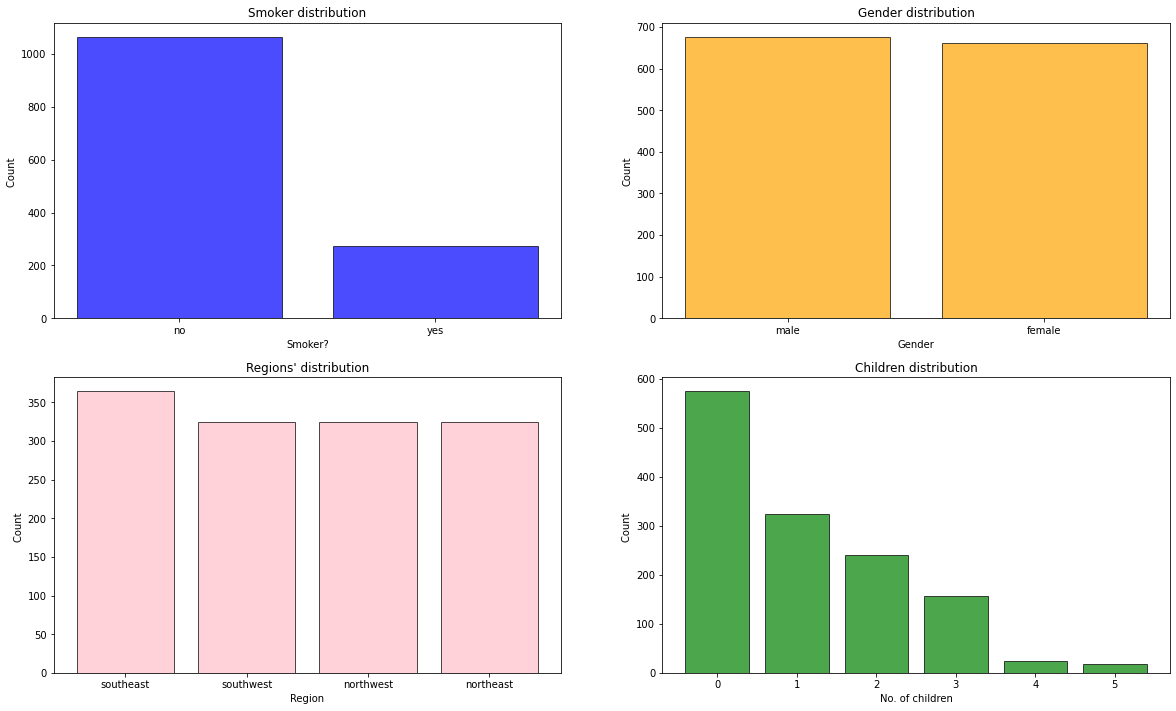

In [11]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'orange',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'pink',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

### ● There are a lot more non-smokers than there are smokers in the data
### ● Instances are distributed evenly accross all regions
### ● Gender is also distributed evenly
### ●Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair

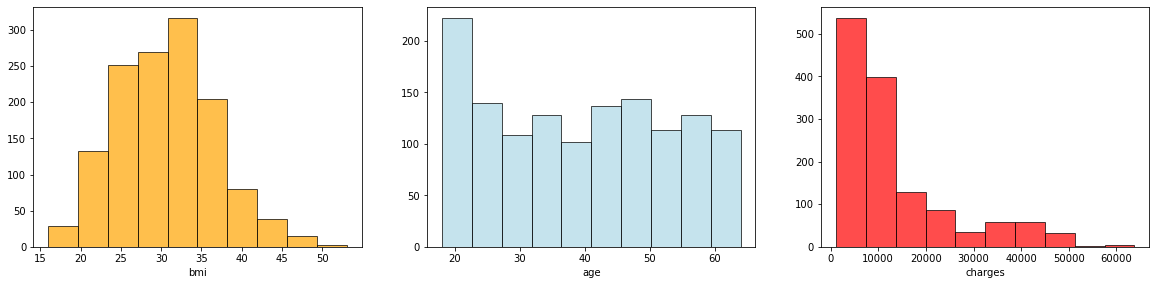

In [12]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

### ● bmi looks quiet normally distributed
### ● Age seems be be distributed quiet uniformly¶
### ● As seen in the previous step, charges are highly skewed
### ● The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

In [13]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.281822
age,0.055610
charges,1.514176


### ● Skew of bmi is very less as seen in the previous step
### ●  age is uniformly distributed and there's hardly any skew
### ● charges are highly skewed

## Checking for the outliers

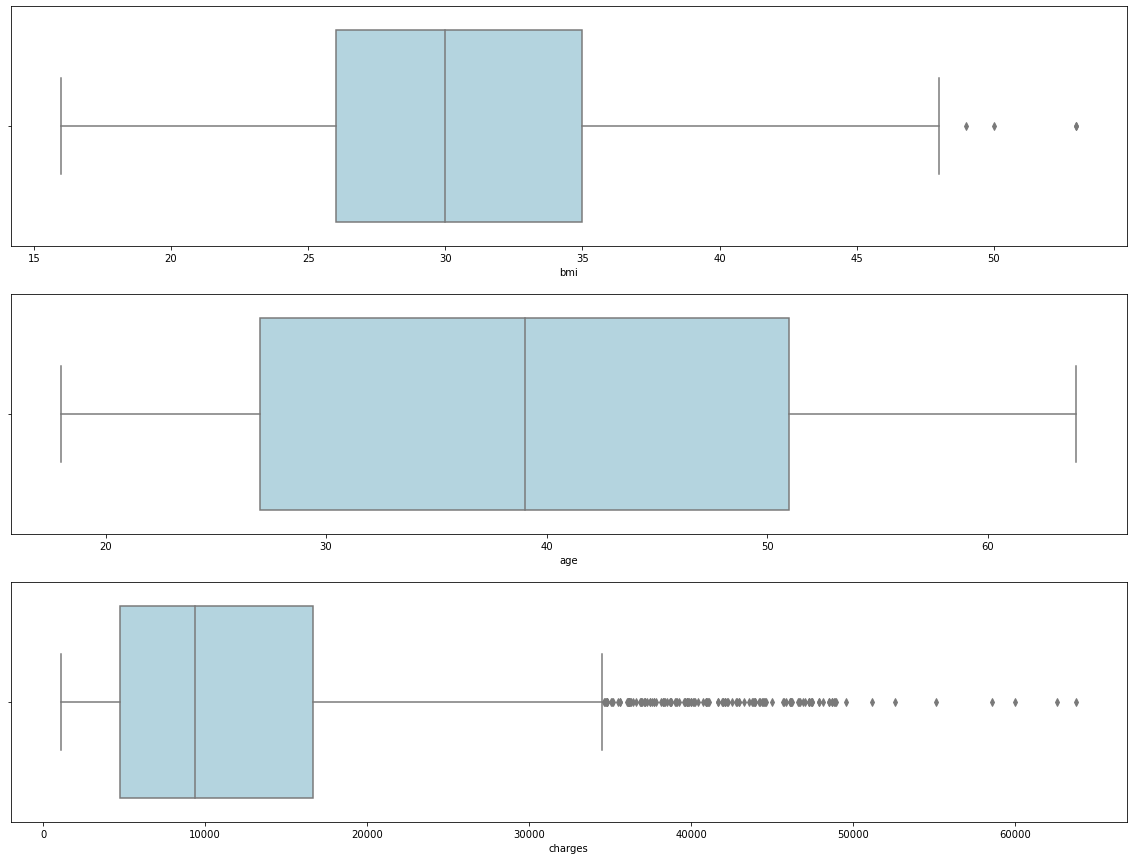

In [14]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

### ● bmi has a few extreme values
### ● charges as it is highly skewed, there are quiet a lot of extreme values

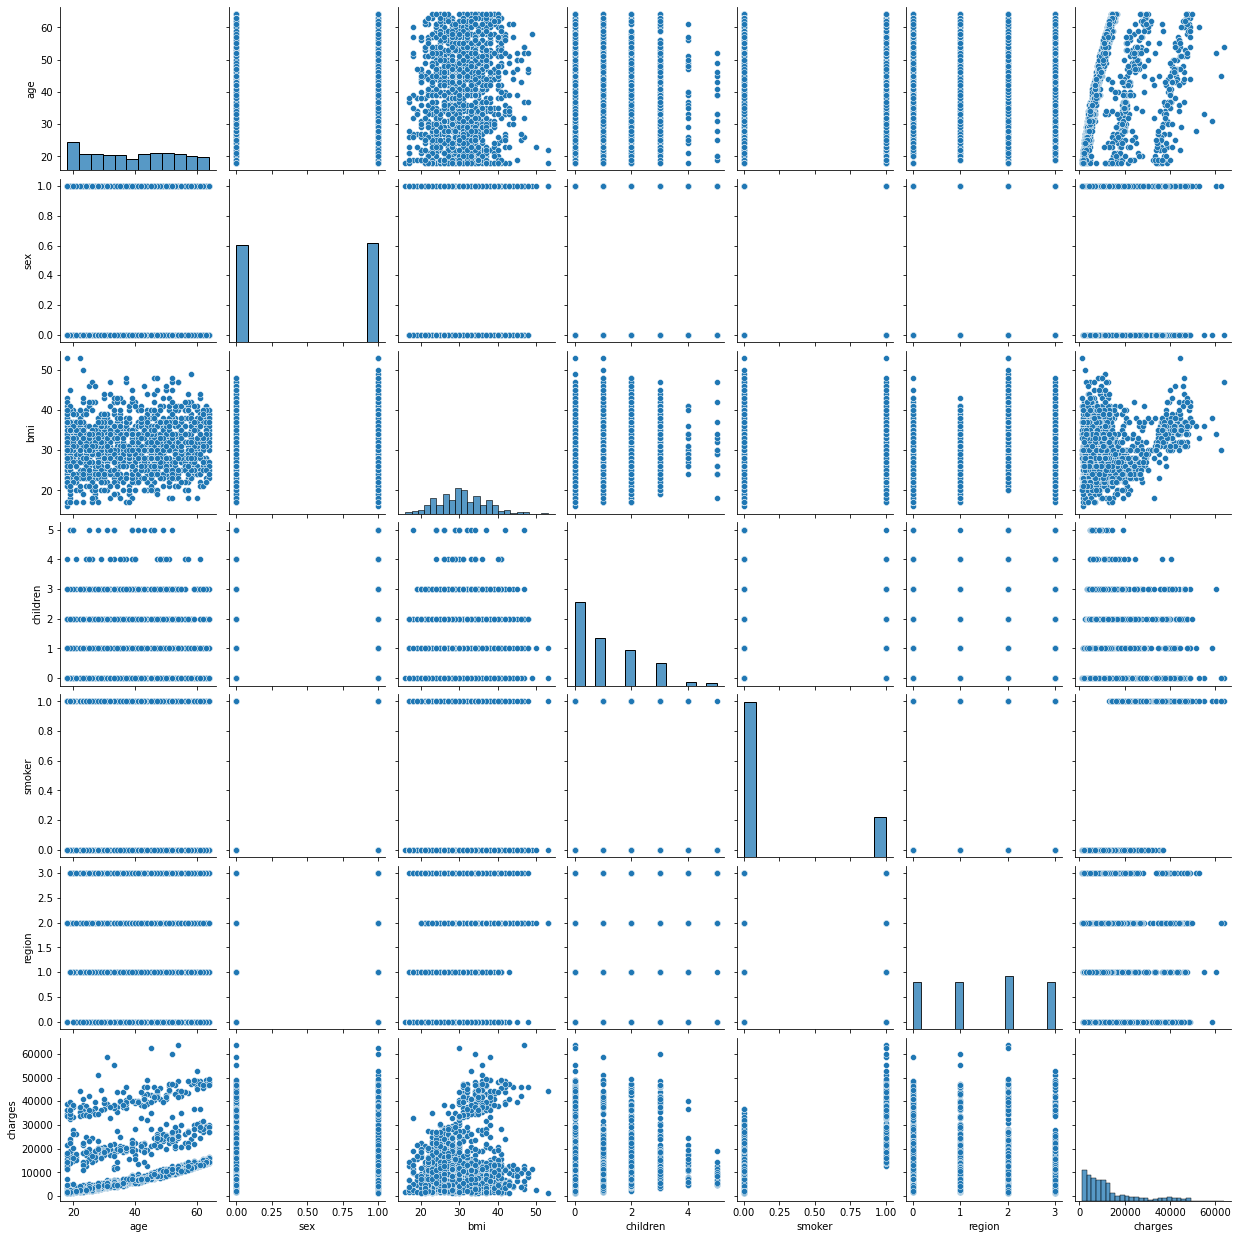

In [15]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

### ● The only obvious correlation of 'charges' is with 'smoker'
### ● Looks like smokers claimed more money than non-smokers
### ● There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

In [16]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

## Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages

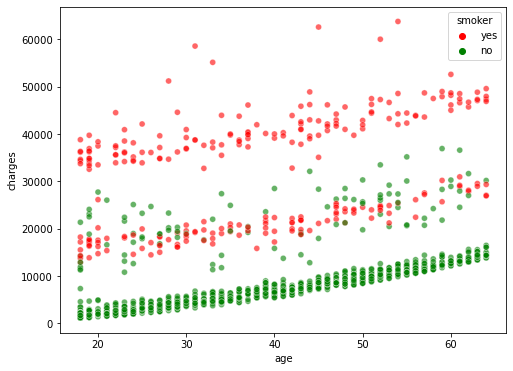

In [17]:

plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

### Visually the difference between charges of smokers and charges of non-smokers is apparent

### Smokers seem to claim significantly more money than non-smokers

## Scatter plot to look for visual evidence of dependency between attributes sex and charges accross different ages

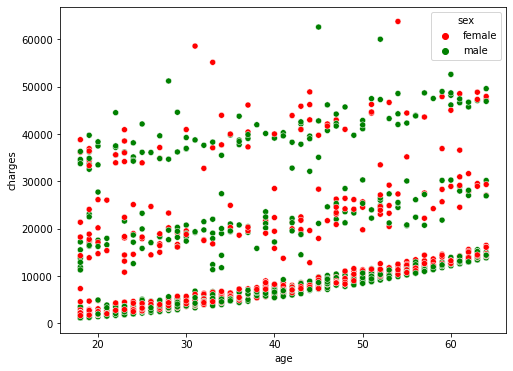

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['red','green'] )
plt.show()

### ● Visually, there is no apparent relation between gender and charges

## Contingency table of sex and smoker attributes

In [19]:
crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


### ● From above proportion of smokers in males is significantly different from that of the females

## Contingency table of smoker and region attributes

In [20]:
crosstab1 = pd.crosstab(df['smoker'], df['region']) 
crosstab1

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### ● From above smoking habbits of people of different regions are similar

# Model Building

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error , mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [22]:
df2 = df.drop(columns=['children_status'])

In [23]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867
...,...,...,...,...,...,...,...
1333,50,male,31,3,no,northwest,10601
1334,18,female,32,0,no,northeast,2206
1335,18,female,37,0,no,southeast,1630
1336,21,female,26,0,no,southwest,2008


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df2.sex.drop_duplicates()) 
df2.sex = le.transform(df2.sex)
# smoker or not
le.fit(df2.smoker.drop_duplicates()) 
df2.smoker = le.transform(df2.smoker)
#region
le.fit(df2.region.drop_duplicates()) 
df2.region = le.transform(df2.region)

df2[df2.select_dtypes(include=['object']).columns] = df2[df2.select_dtypes(include=['object']).columns].apply(le.fit_transform)


In [26]:
df2.corr()['charges'].sort_values()

region     -0.006208
sex         0.057291
children    0.067997
bmi         0.198323
age         0.299009
smoker      0.787252
charges     1.000000
Name: charges, dtype: float64

In [27]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,28,0,1,3,16885
1,18,1,34,1,0,2,1726
2,28,1,33,3,0,2,4449
3,33,1,23,0,0,1,21984
4,32,1,29,0,0,1,3867
...,...,...,...,...,...,...,...
1333,50,1,31,3,0,1,10601
1334,18,0,32,0,0,0,2206
1335,18,0,37,0,0,2,1630
1336,21,0,26,0,0,3,2008


<AxesSubplot:>

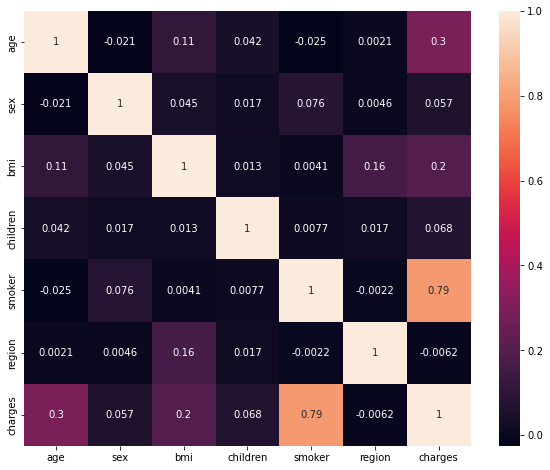

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True)

In [29]:
X = df2.drop(columns=['charges','region'])     # independant variables
y = df2['charges']   

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test  = train_test_split(X , y , random_state=11)

In [31]:
algos = [LinearRegression(),  Ridge(), Lasso(),ElasticNet(),
          KNeighborsRegressor(), DecisionTreeRegressor() , RandomForestRegressor(), GradientBoostingRegressor() ]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet',
         'K Neighbors Regressor', 'Decision Tree Regressor', 'RandomForestRegressor','GradientBoostingRegressor' ]


In [32]:
r2_test_list = []
r2_train_list = []

rmse_test_list = []
rmse_train_list = []

for name in algos:
    
    model = name
    model.fit(X_train,y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    r2_test = r2_score(y_test,y_pred_test)
    r2_train = r2_score(y_train,y_pred_train)
    
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    
    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)
    
    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)

In [33]:
evaluation = pd.DataFrame({'Model': names,
                           'r2_test_score': r2_test_list,
                           'r2_train_score': r2_train_list,
                           'RMSE_test': rmse_test_list,
                           'RMSE_train': rmse_train_list,
                           })

In [34]:
evaluation

,Model,r2_test_score,r2_train_score,RMSE_test,RMSE_train
0,Linear Regression,0.796048,0.734606,5342.129667,6282.391927
1,Ridge Regression,0.795640,0.734584,5347.479703,6282.657600
2,Lasso Regression,0.796045,0.734606,5342.179660,6282.392842
3,ElasticNet,0.390546,0.389256,9234.668418,9530.359272
4,K Neighbors Regressor,0.146875,0.446786,10925.899230,9070.393569
5,Decision Tree Regressor,0.681290,0.990030,6678.040302,1217.661257
6,RandomForestRegressor,0.830470,0.967669,4870.506613,2192.744693
7,GradientBoostingRegressor,0.865332,0.881753,4340.941638,4193.486378


## Conclusion :- 
### ● Here we get overall good balanced R2 score and RMSE score on both test and train data.
### ● Here we get overall good R2 score and lowest RMSE score on both test and train data with Gradient boosting regressor.